In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import seaborn as sns
from scipy import stats

In [2]:
plt.style.use('ggplot')
sns.set_context('notebook')
sns.set_style('ticks')

In [3]:
iris = sns.load_dataset('iris')
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# **KMeans Clustering**

K-means clustering is one of the simplest **unsupervised machine learning** algorithms. It can be defined as the task of identifying subgroups in the data such that data points in the same subgroup (cluster) are very similar while data points in different clusters are very different. In other words, we try to find homogeneous subgroups within the data such that data points in each cluster are as similar as possible according to a similarity measure such as euclidean-based distance or correlation-based distance. The decision of which similarity measure to use is application-specific.

In [4]:
from sklearn.cluster import KMeans

**Parameters of KMeans:** n_clusters (default=8), n_init (default=10), max_iter (default=300), init{‘k-means++’, ‘random’, ndarray, callable} (default='k-means++')

**Attributes of KMeans:** cluster_centers_, labels_, inertia_, n_iter_  

**Inertia (Sum of Squared Distances):** Intuitively, inertia tells how far away the points within a cluster are. Therefore, a small of inertia is aimed for. The range of inertia’s value starts from zero and goes up.  
**Silhouette score:** Silhouette score tells how far away the datapoints in one cluster are, from the datapoints in another cluster. The range of silhouette score is from -1 to 1. Score should be closer to 1 than -1.

Choosing the values of feature columns of the data

In [5]:
X = iris.iloc[:, 0:4].values  # may use X=iris.iloc[:, 0:4], but use X.iloc[] to call rows in plotting
y = iris.iloc[:, -1]

Elbow method for optimal number of clusters

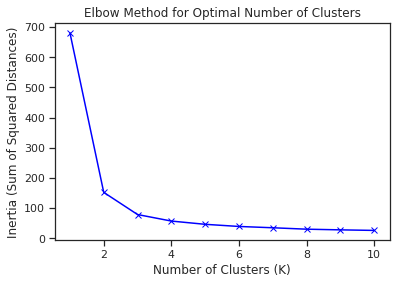

In [6]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

Choosing n_clusters = 3 to create a K-means algorithm

In [7]:
kmeans = KMeans(n_clusters=3, random_state=123)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [8]:
centroids = kmeans.cluster_centers_
centroids

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [9]:
labels = kmeans.labels_

In [10]:
y_pred = kmeans.fit_predict(X)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

The following could be o in this case because there are only 3 classes. But if the algorithm defined is not good, then it may not be zero.

In [11]:
(labels != y_pred).sum()

0

Showing 3D plot of the clusters with 3 centroids

For the first two codes, may use the following:  
from mpl_toolkits.mplot3d import Axes3D  
fig = plt.figure(figsize = [10,10])  
ax = Axes3D(fig)

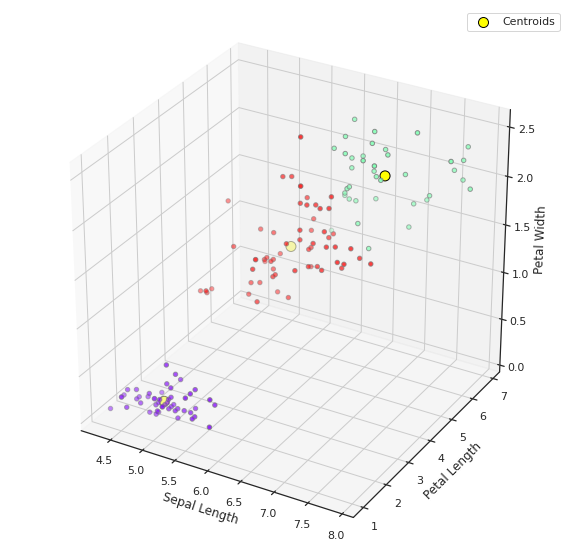

In [12]:
fig = plt.figure(figsize = [10,10])
ax = fig.add_subplot(111, projection='3d')

# plot the clusters using the first, third, and forth variables
ax.scatter(X[:, 0], X[:, 2], X[:, 3], c=labels, cmap='rainbow', s=20, edgecolor='gray')
# plot the centroids
ax.scatter(centroids[:, 0], centroids[:, 2], centroids[:, 3], 
           s=100, c='yellow', edgecolor='black', label='Centroids')

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Petal Length')
ax.set_zlabel('Petal Width')
ax.legend()
plt.show()

Same plot, but showing the legend

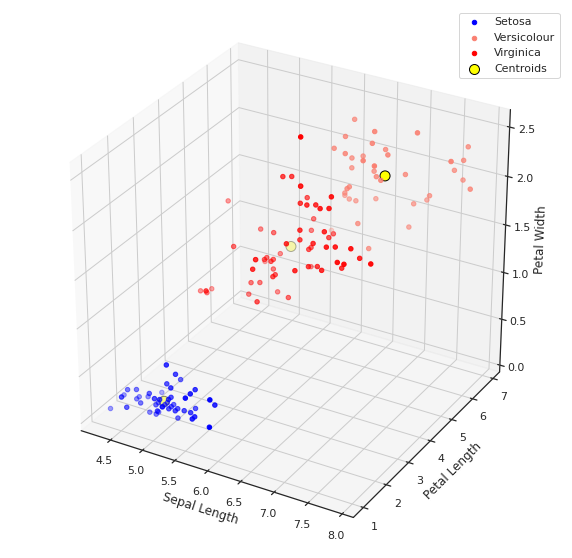

In [13]:
fig = plt.figure(figsize = [10,10])
ax = fig.add_subplot(111, projection='3d')
colors = ['blue', 'salmon', 'red']

# plot the clusters using the first, third, and forth variables according to labels to define the legend
for i in np.unique(labels):
  ax.scatter(X[labels==i, 0], X[labels==i, 2], X[labels==i, 3], label=i, c=colors[i], s=20)
# plot the centroids
ax.scatter(centroids[:, 0], centroids[:, 2], centroids[:, 3], 
           s=100, c='yellow', edgecolor='black', label='Centroids')

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Petal Length')
ax.set_zlabel('Petal Width')
ax.legend(labels={'Setosa':0, 'Versicolour':1, 'Virginica':2, 'Centroids':'Centroids'})
plt.show()

The first 3 plots display what a K-means algorithm would yield using three clusters. The third plot shows what the effect of a bad initialization is on the classification process: By setting n_init = 1 (default = 10), the amount of times that the algorithm will be run with different centroid seeds is reduced. The last plot displays the ground truth.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: Mean of empty slice.


TypeError: ignored

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


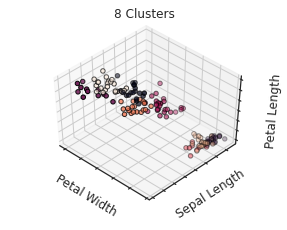

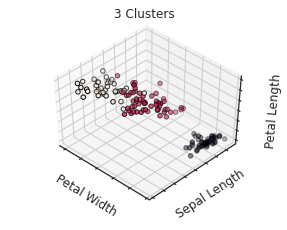

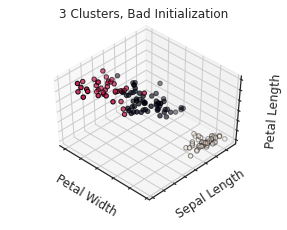

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


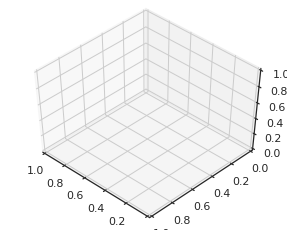

In [16]:
import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(5)

estimators = [('k_means_8', KMeans(n_clusters=8)),
              ('k_means_3', KMeans(n_clusters=3)),
              ('k_means_3_bad_init', KMeans(n_clusters=3, n_init=1, init='random'))]

fignum = 1
titles = ['8 Clusters', '3 Clusters', '3 Clusters, Bad Initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal Width')
    ax.set_ylabel('Sepal Length')
    ax.set_zlabel('Petal Length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()